 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [140]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns 
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [141]:
# Reading whale returns
whale_filepath = "./Resources/whale_returns.csv"
whale_df = pd.read_csv(whale_filepath, parse_dates=True, index_col="Date", infer_datetime_format=True).sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [ ]:
# Sort the date index in ascending order
whale_df = whale_df.sort_index()
algo_df = algo_df.sort_index()
sp_tsx_df = sp_tsx_df.sort_index()

In [142]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [143]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [144]:
# Reading algorithmic returns
algo_filepath = "./Resources/algo_returns.csv"
algo_df = pd.read_csv(algo_filepath, parse_dates=True, index_col="Date", infer_datetime_format=True).sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [145]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [146]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [147]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_filepath = "./Resources/sp_tsx_history.csv"
sp_tsx_df = pd.read_csv(sp_tsx_filepath, parse_dates=True, index_col="Date", infer_datetime_format=True).sort_index()

In [148]:
# Check Data Types
sp_tsx_df["Close"].dtype

Close    object
dtype: object

In [149]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype('float')
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [150]:
# Calculate Daily Returns
sp_tsx_df["Close"] = sp_tsx_df["Close"].pct_change()
sp_tsx_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [151]:
# Drop nulls
sp_tsx_df = sp_tsx_df.dropna()

In [152]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_df = sp_tsx_df.rename(columns={'Close': 'S&P TSX'})
sp_tsx_df.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [153]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_df, algo_df, sp_tsx_daily_return], axis="columns", join="inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

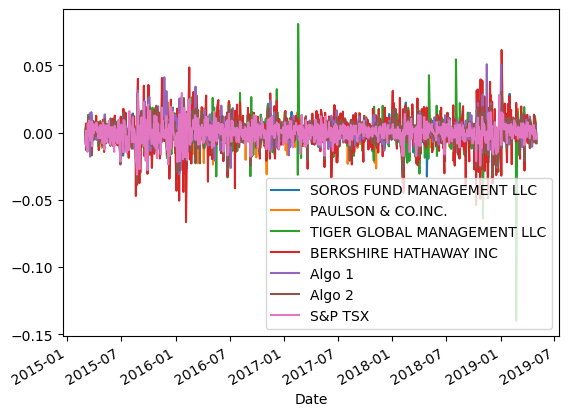

In [114]:
# Plot daily returns of all portfolios
combined.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

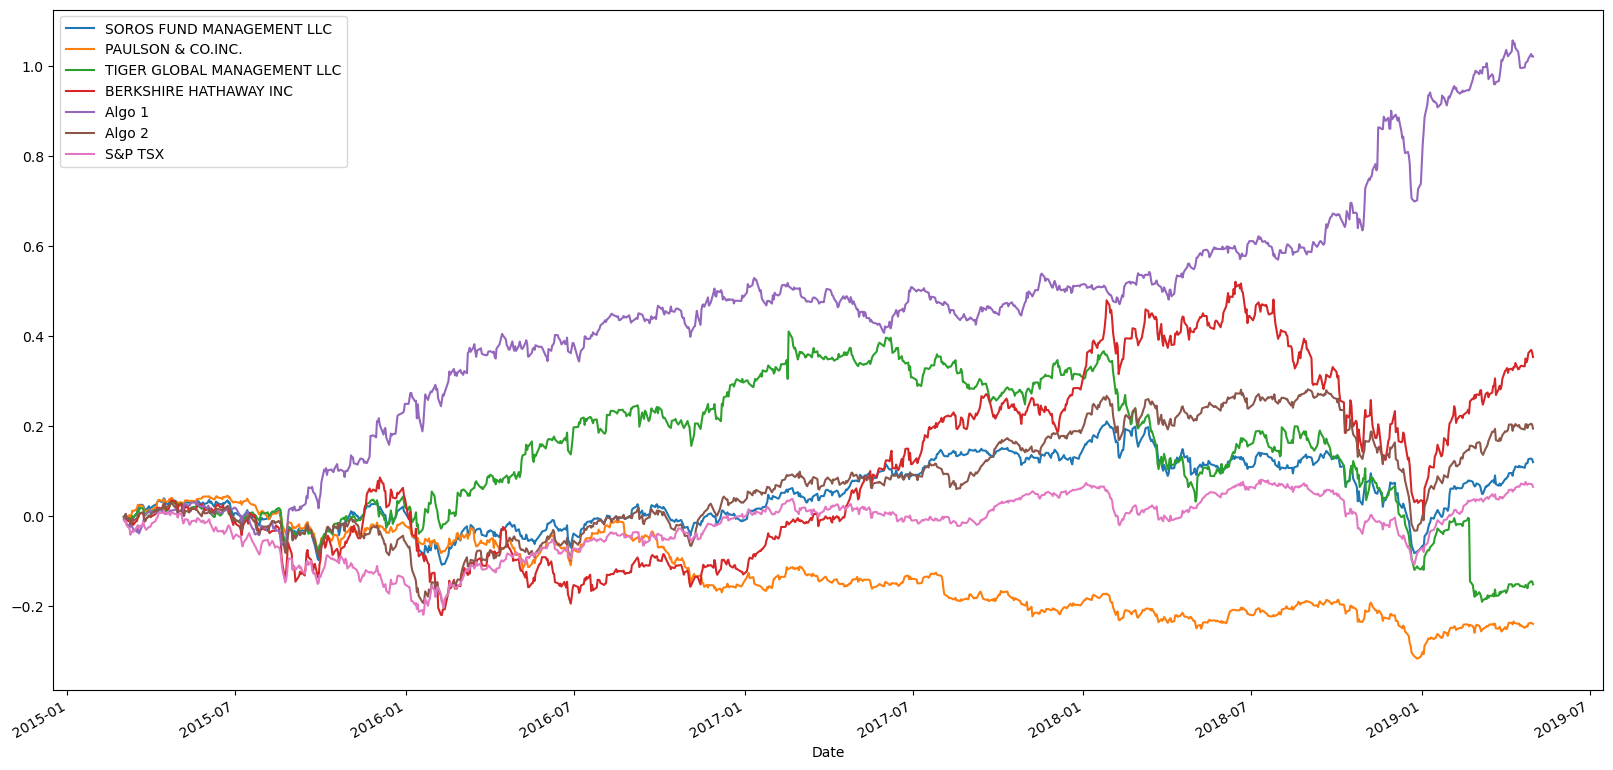

In [94]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

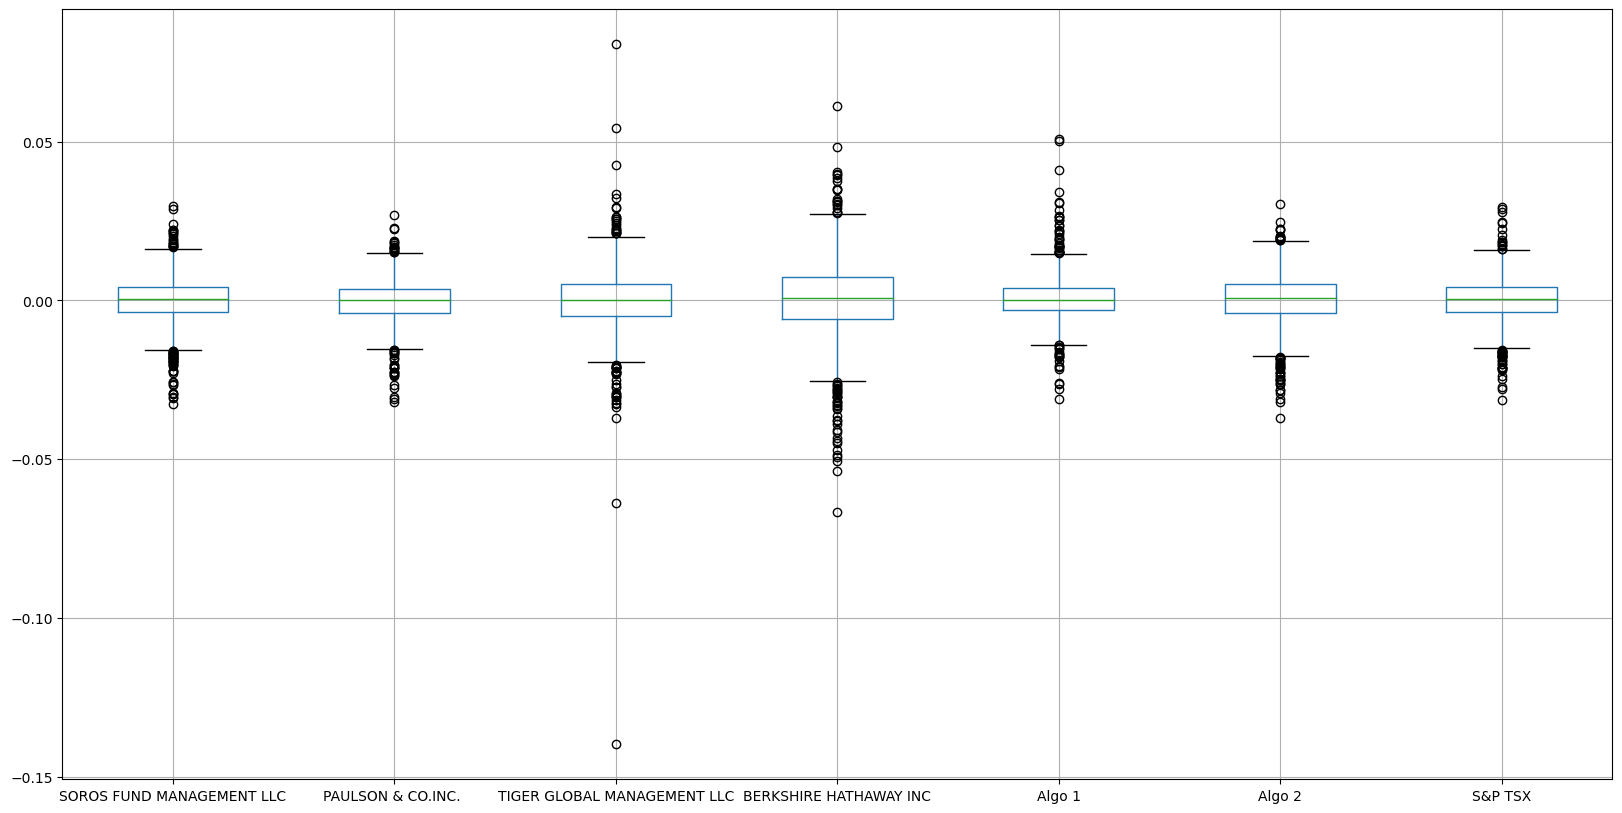

In [95]:
# Box plot to visually show risk
combined.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [102]:
# Calculate the daily standard deviations of all portfolios
combined_returns_sd = combined_returns.std().sort_values(ascending = True)
print(f"Standard deviation for each portfolio is as under (in ascending order): \n{combined_return

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [126]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = combined["S&P TSX"].std()

# Determine which portfolios are riskier than the S&P TSX 60
riskier_portfolios = std[std > sp_tsx_std]
riskier_portfolios

SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

### Calculate the Annualized Standard Deviation

In [127]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_deviation  = std * np.sqrt(252)
annualized_standard_deviation

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

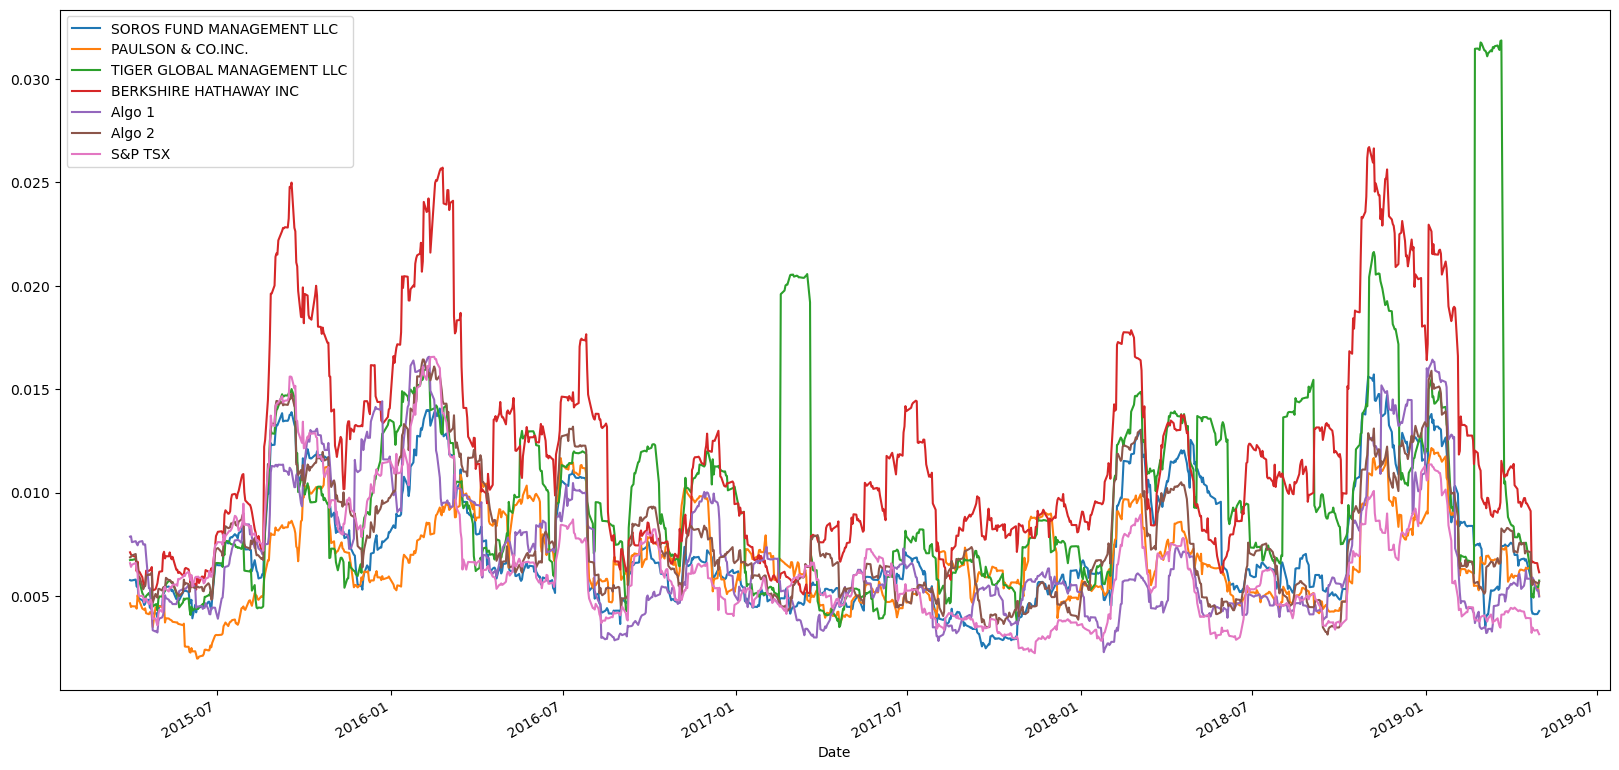

In [129]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_standard_deviation = combined.rolling(window=21).std()
rolling_standard_deviation
# Plot the rolling standard deviation
rolling_standard_deviation.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

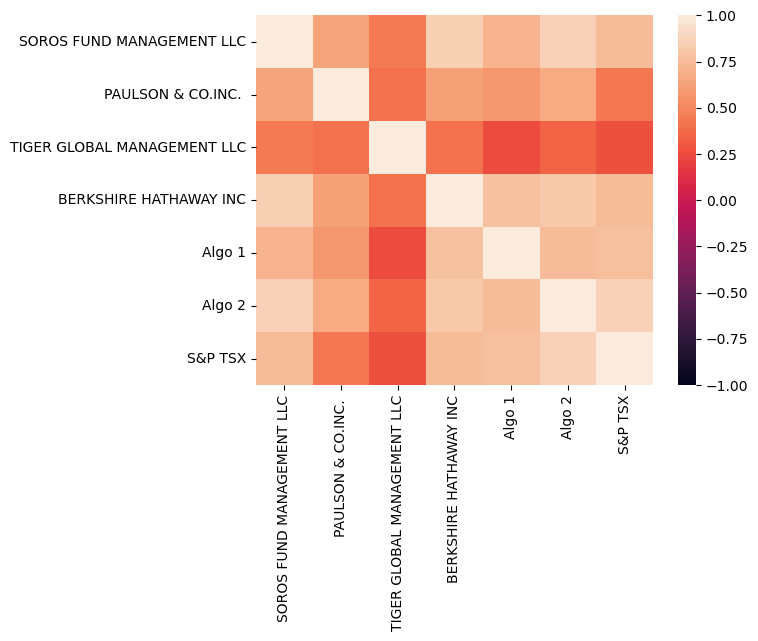

In [130]:
# Calculate the correlation
correlation = rolling_standard_deviation.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1) 

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

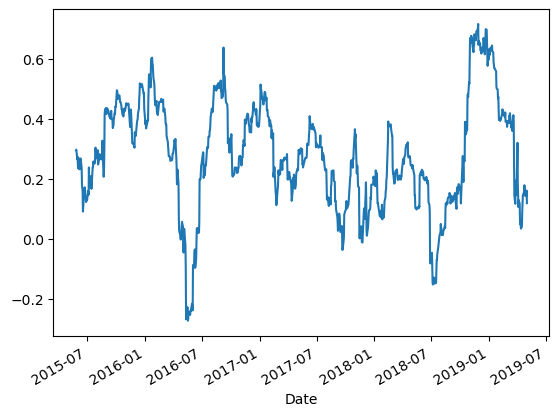

In [132]:
# Calculate covariance of a single portfolio
algo_1_covar = combined["Algo 1"].rolling(window=60).cov(combined["S&P TSX"])

# Calculate variance of S&P TSX
sp_tsx_var = combined["S&P TSX"].rolling(window=60).var()

# Computing beta
beta = algo_1_covar / sp_tsx_var

# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [137]:
# Use `ewm` to calculate the rolling window
exponentially_weighted_average = combined.ewm(halflife=21).std().dropna()
exponentially_weighted_average

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
2015-03-10,0.005816,0.004707,0.006864,0.007841,0.002947,0.007315,0.005485
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [138]:
# Annualized Sharpe Ratios
sharpe_ratio = ((combined_returns.mean()*252)/(combined_returns.std()*np.sqrt(252)))
print (f"The Sharpe Ratio for each portfolio is as under:\n{sharpe_ratio}")

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

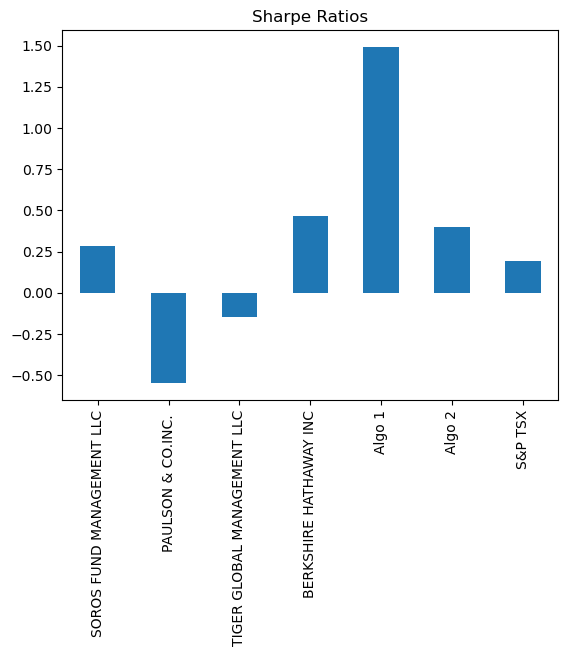

In [139]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data
